In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import nltk

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re,string,unicodedata

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import re
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive/")


Mounted at /content/drive/


In [ ]:
dataset_path = '/content/drive/MyDrive/IMDB-Dataset.csv'

In [ ]:
df=pd.read_csv(dataset_path)

In [ ]:
df.head()

,Ratings,Reviews,Movies,Resenhas
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie,* Isenção de responsabilidade: eu só assisti e...
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie,Estou escrevendo isso na esperança de que isso...
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie,"Realmente, eu poderia escrever uma crítica con..."
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie,Se você viu os outros filmes falsificados ante...
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie,Este filme eu vi um dia cedo de graça e ainda ...


**PREPROCESSING AND CLEANING**

In [ ]:
df=df.drop('Resenhas',axis=1)

In [ ]:
df.head()

,Ratings,Reviews,Movies
0,1.0,*Disclaimer: I only watched this movie as a co...,Disaster Movie
1,1.0,I am writing this in hopes that this gets put ...,Disaster Movie
2,1.0,"Really, I could write a scathing review of thi...",Disaster Movie
3,1.0,If you saw the other previous spoof movies by ...,Disaster Movie
4,1.0,This movie I saw a day early for free and I st...,Disaster Movie


In [ ]:
#downloading stopwords from nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

**Data Preprocessing**

In [ ]:
#appending new stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
new_stopwords = ["would","shall","could","might"]
stop_words.extend(new_stopwords)
stop_words.remove("not")
stop_words=set(stop_words)
print(stop_words)

{'she', 'has', 'but', 'm', "needn't", 'shan', 've', 'were', 'how', 'would', 'them', 'did', 'i', 'until', 'there', 'don', 'is', 'he', 'doesn', "hasn't", 'won', 'before', 'should', 'll', 'hadn', 'doing', "should've", 's', "wasn't", 'ours', "you've", 'own', 'under', 'some', 'very', 'or', 'few', 'between', 'at', 'its', 'no', 'in', 'hers', "that'll", 'nor', 'below', 'same', 'could', 'ourselves', "you'd", "don't", 'ain', "won't", 'our', 'couldn', 'where', 'aren', "haven't", 'yourselves', 'above', 'so', 'didn', 'this', 'while', 'when', 't', 'yours', 'be', 'through', 'will', 'weren', "you're", "isn't", 'over', "mightn't", 'your', 'off', "she's", 'my', 'more', 'had', 'the', 'of', 'with', 'themselves', "doesn't", 'theirs', 'only', 'that', 'all', 'such', 'out', 'shouldn', 'have', 'itself', 'their', 'here', 'because', 'they', 'being', 'can', 'shall', "shouldn't", 'o', 'wasn', 'again', 'once', 'd', 'down', 're', 'other', 'just', 'from', 'myself', 'having', "shan't", "weren't", 'up', 'needn', "could

**Data Cleaning**

In [ ]:

def remove_special_character(content):
    return re.sub('\W+',' ', content )

def remove_url(content):
    return re.sub(r'http\S+', '', content)

def remove_stopwords(content):
    clean_data = []
    for i in content.split():
        if i.strip().lower() not in stop_words and i.strip().lower().isalpha():
            clean_data.append(i.strip().lower())
    return " ".join(clean_data)

In [ ]:
# Expansion of english contractions
def contraction_expansion(content):
    content = re.sub(r"won\'t", "would not", content)
    content = re.sub(r"can\'t", "can not", content)
    content = re.sub(r"don\'t", "do not", content)
    content = re.sub(r"shouldn\'t", "should not", content)
    content = re.sub(r"needn\'t", "need not", content)
    content = re.sub(r"hasn\'t", "has not", content)
    content = re.sub(r"haven\'t", "have not", content)
    content = re.sub(r"weren\'t", "were not", content)
    content = re.sub(r"mightn\'t", "might not", content)
    content = re.sub(r"didn\'t", "did not", content)
    content = re.sub(r"n\'t", " not", content)
    content = re.sub(r"\'re", " are", content)
    content = re.sub(r"\'s", " is", content)
    content = re.sub(r"\'d", " would", content)
    content = re.sub(r"\'ll", " will", content)
    content = re.sub(r"\'t", " not", content)
    content = re.sub(r"\'ve", " have", content)
    content = re.sub(r"\'m", " am", content)
    return content

In [ ]:
def data_cleaning(content):
    content = contraction_expansion(content)
    content = remove_special_character(content)
    content = remove_url(content)

    content = remove_stopwords(content)
    return content

In [ ]:
pd.options.display.max_colwidth = 1000
df['Reviews_clean']=df['Reviews'].apply(data_cleaning)


**DATA OVERVIEW**

In [ ]:
#showing all null values
df.isna().sum()

Ratings           0
Reviews           0
Movies           25
Reviews_clean     0
dtype: int64

In [ ]:
df['Ratings'].describe()

count    150000.000000
mean          5.500000
std           2.872291
min           1.000000
25%           3.000000
50%           5.500000
75%           8.000000
max          10.000000
Name: Ratings, dtype: float64

In [ ]:
df['Reviews_clean'].describe()

count                                                                   150000
unique                                                                  149753
top       story soundtrack dialog graphic reasonableness entertainment overall
freq                                                                        10
Name: Reviews_clean, dtype: object

In [ ]:
print('Unique reviews:%s' % df.Reviews_clean.nunique())
print('Unique movie names:%s' % df.Movies.nunique())
print('No of ratings:%s'% df.Ratings.count())

Unique reviews:149753
Unique movie names:14206
No of ratings:150000


**EDA**

Text(0.5, 1.0, 'Negative Reviews')

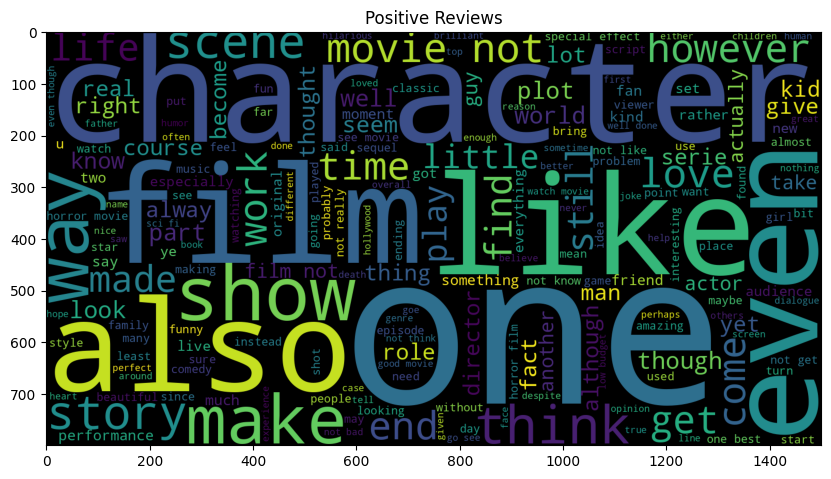

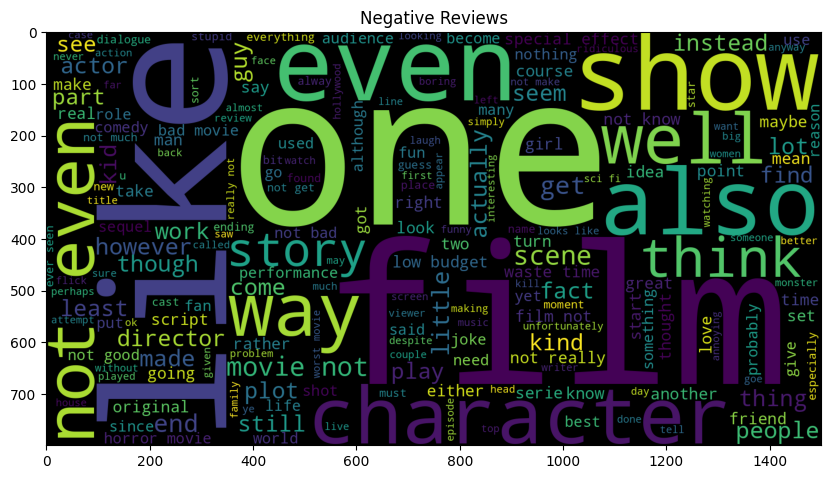

In [ ]:
#wordcloud of positive words and negative words in the cleaned reviews

reviews=df['Reviews_clean']
pos=' '.join(map(str,reviews[df['Ratings']>=7]))
neg=' '.join(map(str,reviews[df['Ratings']<=4]))


pos_wordcloud = WordCloud(width = 1500, height = 800, background_color ='black', stopwords = stop_words, min_font_size = 15).generate(pos)

plt.figure(figsize=(10,10))
plt.imshow(pos_wordcloud)
plt.title('Positive Reviews')

neg_wordcloud = WordCloud(width = 1500, height = 800, background_color ='black', stopwords = stop_words, min_font_size = 15).generate(neg)

plt.figure(figsize=(10,10))
plt.imshow(neg_wordcloud)
plt.title('Negative Reviews')


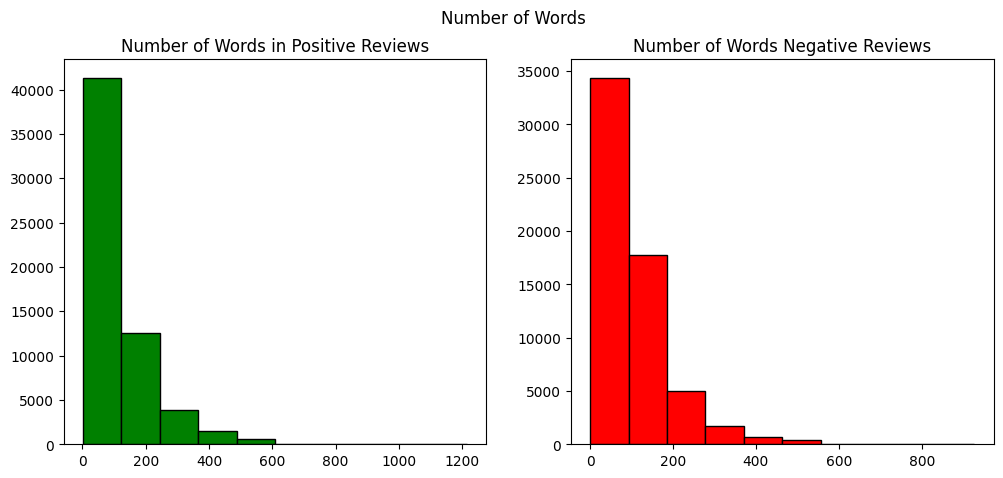

In [ ]:
#Visulaization of number of words in reviews
figure,(pos_ax,neg_ax)=plt.subplots(1,2,figsize=(12,5))
pos_word=df[df['Ratings']>=7]['Reviews_clean'].str.split().map(lambda review: len(review))
pos_ax.hist(pos_word,color='green',edgecolor='black')
pos_ax.set_title('Number of Words in Positive Reviews')
neg_word=df[df['Ratings']<=4]['Reviews_clean'].str.split().map(lambda review: len(review))
neg_ax.hist(neg_word,color='red', edgecolor='black')
neg_ax.set_title('Number of Words Negative Reviews')
figure.suptitle('Number of Words')
plt.show()

**VISUALISATION OF WORDS BIGRAMS,TRIGRAMS IN POSITIVE REVIEWS**

In [ ]:
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
most_common_uni = get_top_text_ngrams(df.Reviews_clean[df['Ratings']>=7],20,1)
most_common_uni = dict(most_common_uni)
temp = pd.DataFrame(columns = ["Common_words" , 'Count'])
temp["Common_words"] = list(most_common_uni.keys())
temp["Count"] = list(most_common_uni.values())
fig = px.bar(temp, x="Count", y="Common_words", title='Common Words in Positive Reviews', orientation='h',
             width=700, height=700,color='Common_words')
fig.show()

**FEATURE EXTRACTION**

In [ ]:
df['Label'] = df['Ratings'].apply(lambda x: '1' if x >= 7 else ('0' if x<=4 else '2'))
df=df[df['Label']<'2']

X=df['Reviews_clean']
y=df['Label']

#data=df[['Reviews_clean','Label']]
print(df['Label'].value_counts())

0    60000
1    60000
Name: Label, dtype: int64


In [ ]:
import sys
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from prettytable import PrettyTable
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
v=CountVectorizer(max_df=0.90, min_df=2, max_features=1000, stop_words='english')

In [ ]:
X=v.fit_transform(X)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, shuffle=True)

In [ ]:
y_test=y_test.astype(int)
y_train=y_train.astype(int)

In [ ]:
import sys
import numpy as np
import scipy as sp
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

**STORING THE SCORES**

In [ ]:
ML_Model = []
f1 = []
roc = []
accuracy = []
recall = []
precision = []

def results(model, a, b, c, d, e):
  ML_Model.append(model)
  f1.append(round(a, 3))
  roc.append(round(b, 3))
  accuracy.append(round(c, 3))
  recall.append(round(d, 3))
  precision.append(round(e, 3))

***LOGISTIC REGRESSION***

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
pred = model.predict(X_test)


In [ ]:
model.score(X_test,y_test)

0.8554333333333334

 ***DECISION TREE***

In [ ]:
tree=DecisionTreeClassifier()

In [ ]:
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
pred1=tree.predict(X_test)

In [ ]:
tree.score(X_test,y_test)

0.7102

 ***NAIVE BAYES***

In [ ]:
bayes=MultinomialNB()

In [ ]:
bayes.fit(X_train,y_train)

MultinomialNB()

In [ ]:
nb_pred=bayes.predict(X_test)

In [ ]:
bayes.score(X_test,y_test)

0.8353666666666667

 ***RANDOM FOREST CLASSIFIER***

In [ ]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [ ]:
rf_pred=rf.predict(X_test)

In [ ]:
rf.score(X_test,y_test)

0.8244333333333334

## Evaluation of the model


In [ ]:
def confusion_matrix_plot(y_test,y_score):
    confmatrix = confusion_matrix(y_test,y_score)
    fig, ax = plt.subplots(figsize=(5,5))
    ax.imshow(confmatrix)
    ax.grid(False)
    ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
    ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
    ax.set_ylim(1.5, -0.5)
    for i in range(2):
        for j in range(2):
            ax.text(j, i, confmatrix[i, j], ha='center', va='center', color='black')
    plt.show()

### Logistic Regression Evaluation

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score,accuracy_score,roc_auc_score

In [ ]:
print('F1 Score for Logistic Regression:', f1_score(y_test,pred))
print('AUC Score for Logistic Regression:', roc_auc_score(y_test,pred))
print('Precision Score for Logistic Regression:', precision_score(y_test,pred))
print('Recall Score for Logistic Regression:', recall_score(y_test,pred))
print('Accuracy Score for Logistic Regression:', accuracy_score(y_test,pred))
print('Classification Report for Logistic Regression: \n\n', classification_report(y_test,pred))

F1 Score for Logistic Regression: 0.8542331865694217
AUC Score for Logistic Regression: 0.8554299902610423
Precision Score for Logistic Regression: 0.8534013833859379
Recall Score for Logistic Regression: 0.8550666128381106
Accuracy Score for Logistic Regression: 0.8554333333333334
Classification Report for Logistic Regression: 

               precision    recall  f1-score   support

           0       0.86      0.86      0.86     15138
           1       0.85      0.86      0.85     14862

    accuracy                           0.86     30000
   macro avg       0.86      0.86      0.86     30000
weighted avg       0.86      0.86      0.86     30000



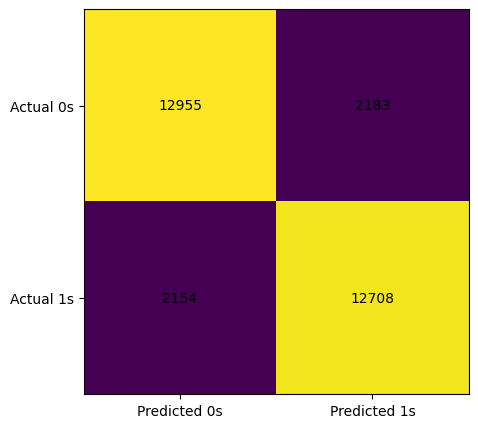

In [ ]:
confusion_matrix_plot(y_test,pred)

In [ ]:
results('Logistic Regression', f1_score(y_test,pred), roc_auc_score(y_test,pred), accuracy_score(y_test,pred), precision_score(y_test,pred), recall_score(y_test,pred))

### Decision Tree Evaluation

In [ ]:
print('F1 Score for Decision Tree:', f1_score(y_test,pred1))
print('AUC Score for Decision Tree:', roc_auc_score(y_test,pred1))
print('Precision Score for Decision Tree:', precision_score(y_test,pred1))
print('Recall Score for Decision Tree:', recall_score(y_test,pred1))
print('Accuracy Score for Decision Tree:', accuracy_score(y_test,pred1))
print('Classification Report for Decision Tree: \n\n', classification_report(y_test,pred1))

F1 Score for Decision Tree: 0.7068779501011464
AUC Score for Decision Tree: 0.7101558409237091
Precision Score for Decision Tree: 0.7084065414245169
Recall Score for Decision Tree: 0.705355941326874
Accuracy Score for Decision Tree: 0.7102
Classification Report for Decision Tree: 

               precision    recall  f1-score   support

           0       0.71      0.71      0.71     15138
           1       0.71      0.71      0.71     14862

    accuracy                           0.71     30000
   macro avg       0.71      0.71      0.71     30000
weighted avg       0.71      0.71      0.71     30000



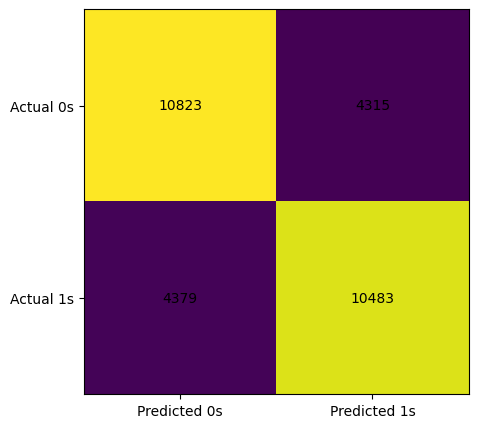

In [ ]:
confusion_matrix_plot(y_test,pred1)

In [ ]:
results('Decision Tree Classifier', f1_score(y_test,pred1), roc_auc_score(y_test,pred1), accuracy_score(y_test,pred1), precision_score(y_test,pred1), recall_score(y_test,pred1))

### Naive Bayes Evaluation

In [ ]:
print('F1 Score for Naive Bayes:', f1_score(y_test,nb_pred))
print('AUC Score for Naive Bayes:', roc_auc_score(y_test,nb_pred))
print('Precision Score for Naive Bayes:', precision_score(y_test,nb_pred))
print('Recall Score for Naive Bayes:', recall_score(y_test,nb_pred))
print('Accuracy Score for Naive Bayes:', accuracy_score(y_test,nb_pred))
print('Classification Report for Naive Bayes: \n\n', classification_report(y_test,nb_pred))

F1 Score for Naive Bayes: 0.8348547162871568
AUC Score for Naive Bayes: 0.8354088556722107
Precision Score for Naive Bayes: 0.8297773346626787
Recall Score for Naive Bayes: 0.839994617144395
Accuracy Score for Naive Bayes: 0.8353666666666667
Classification Report for Naive Bayes: 

               precision    recall  f1-score   support

           0       0.84      0.83      0.84     15138
           1       0.83      0.84      0.83     14862

    accuracy                           0.84     30000
   macro avg       0.84      0.84      0.84     30000
weighted avg       0.84      0.84      0.84     30000



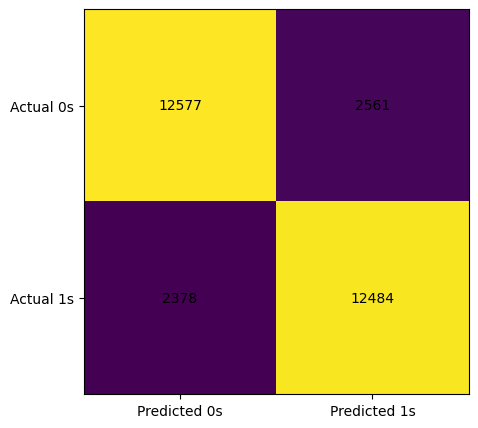

In [ ]:
confusion_matrix_plot(y_test,nb_pred)

In [ ]:
results('Naive Bayes', f1_score(y_test,nb_pred), roc_auc_score(y_test,nb_pred), accuracy_score(y_test,nb_pred), precision_score(y_test,nb_pred), recall_score(y_test,nb_pred))

### Random Forest Evaluation

In [ ]:
print('F1 Score for Random Forest:', f1_score(y_test,rf_pred))
print('AUC Score for Random Forest:', roc_auc_score(y_test,rf_pred))
print('Precision Score for Random Forest:', precision_score(y_test,rf_pred))
print('Recall Score for Random Forest:', recall_score(y_test,rf_pred))
print('Accuracy Score for Random Forest:', accuracy_score(y_test,rf_pred))
print('Classification Report for Random Forest: \n\n', classification_report(y_test,rf_pred))

F1 Score for Random Forest: 0.82375773799565
AUC Score for Random Forest: 0.8244678496254589
Precision Score for Random Forest: 0.8193436730346801
Recall Score for Random Forest: 0.8282196205086798
Accuracy Score for Random Forest: 0.8244333333333334
Classification Report for Random Forest: 

               precision    recall  f1-score   support

           0       0.83      0.82      0.83     15138
           1       0.82      0.83      0.82     14862

    accuracy                           0.82     30000
   macro avg       0.82      0.82      0.82     30000
weighted avg       0.82      0.82      0.82     30000



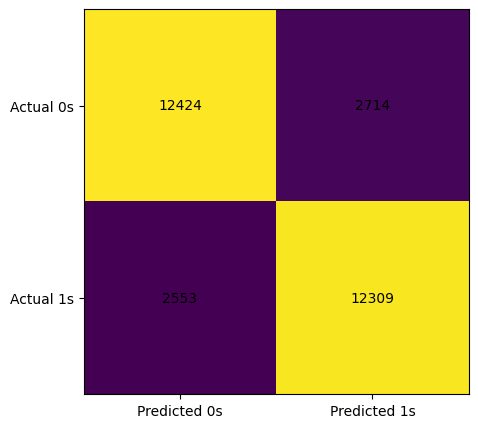

In [ ]:
confusion_matrix_plot(y_test,rf_pred)

In [ ]:
results('Random Forest Classifier', f1_score(y_test,rf_pred), roc_auc_score(y_test,rf_pred), accuracy_score(y_test,rf_pred), precision_score(y_test,rf_pred), recall_score(y_test,rf_pred))

In [ ]:
result = pd.DataFrame({ 'ML Model' : ML_Model,
                        'F1 Score' : f1,
                        'ROC Score': roc,
                        'Accuracy' : accuracy,
                        'Recall'   : recall,
                        'Precision': precision,
                      })

result

,ML Model,F1 Score,ROC Score,Accuracy,Recall,Precision
0,Logistic Regression,0.854,0.855,0.855,0.853,0.855
1,Decision Tree Classifier,0.707,0.710,0.710,0.708,0.705
2,Naive Bayes,0.835,0.835,0.835,0.830,0.840
3,Random Forest Classifier,0.824,0.824,0.824,0.819,0.828


In [ ]:
sortedResult = result.sort_values(by=['Accuracy'], ascending = False).reset_index(drop = True)
sortedResult

,ML Model,F1 Score,ROC Score,Accuracy,Recall,Precision
0,Logistic Regression,0.854,0.855,0.855,0.853,0.855
1,Naive Bayes,0.835,0.835,0.835,0.830,0.840
2,Random Forest Classifier,0.824,0.824,0.824,0.819,0.828
3,Decision Tree Classifier,0.707,0.710,0.710,0.708,0.705


**XAI USING SHAP**

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 7.6 MB/s eta 0:00:00


In [ ]:
import shap

shap.initjs()

In [ ]:
explainer =shap.LinearExplainer(model, X_train)
shap_values = explainer(X_test)

In [ ]:
len(shap_values)

30000

In [ ]:
shap.initjs()
ind =3

print('Probability Score ' ,pred[ind])
shap.plots.force(explainer.expected_value,shap_values[ind].values)


Probability Score  0
